In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.transforms as mtransforms
plt.rc('font',family='Times New Roman')

name = ['NIKKEI.csv', 'HANGSENG.csv', 'SENSEX.csv', 'SP500.csv', 'KOSPI.csv', 'SSE.csv', 'EURONEXT.csv']

In [9]:
global list_yield
list_yield = []
global list_corona
list_corona = []

def yield_01_20(name):
	for i in range(len(name)):
		df = pd.read_csv(name[i], index_col=0, parse_dates=True, na_values='.',infer_datetime_format=True,squeeze=True).fillna(method ='pad')
		df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis='columns', inplace=True)
		num = round(((df['Close'][len(df['Close'])-1]/df['Close'][0])-1)*100,2)
# 		print(df['Close'][len(df['Close'])-1])
		list_yield.append(num)
		num = round(((df['Close'][len(df['Close'])-5]/df['Close'][0])-1)*100, 2)
# 		print(df['Close'][len(df['Close'])-5])
		list_corona.append(num)
    
yield_01_20(name)
# print(list_yield)
# print(list_corona)

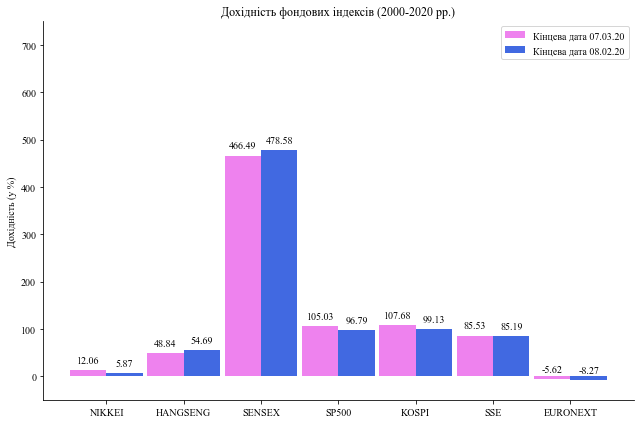

In [10]:
labels = ['NIKKEI', 'HANGSENG', 'SENSEX', 'SP500', 'KOSPI', 'SSE', 'EURONEXT']

x = np.arange(len(labels))
width = 0.47 

fig, ax = plt.subplots(figsize=(9,6))
rects1 = ax.bar(x - width/2, list_yield, width, label='Кінцева дата 07.03.20', color='violet')
rects2 = ax.bar(x + width/2, list_corona, width, label='Кінцева дата 08.02.20', color='royalblue')
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_ylabel('Дохідність (у %)')
ax.set_title('Дохідність фондових індексів (2000-2020 рр.)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5), textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
axes = plt.gca()
axes.set_ylim([-50,750])
fig.tight_layout()
plt.show()
plt.close()